In [31]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

cities = np.atleast_2d(list(tsplib95.load("data/xqf131.tsp").node_coords.values()))
distance_matrix = tsplib_distance_matrix("data/xqf131.tsp")


In [32]:
distance_matrix


array([[  0,  13,  14, ...,  88,  84, 108],
       [ 13,   0,   1, ...,  85,  86, 107],
       [ 14,   1,   0, ...,  85,  87, 107],
       ...,
       [ 88,  85,  85, ...,   0,  32,  25],
       [ 84,  86,  87, ...,  32,   0,  31],
       [108, 107, 107, ...,  25,  31,   0]])

In [33]:
cities

array([[  0,  13],
       [  0,  26],
       [  0,  27],
       [  0,  39],
       [  2,   0],
       [  5,  13],
       [  5,  19],
       [  5,  25],
       [  5,  31],
       [  5,  37],
       [  5,  43],
       [  5,   8],
       [  8,   0],
       [  9,  10],
       [ 10,  10],
       [ 11,  10],
       [ 12,  10],
       [ 12,   5],
       [ 15,  13],
       [ 15,  19],
       [ 15,  25],
       [ 15,  31],
       [ 15,  37],
       [ 15,  43],
       [ 15,   8],
       [ 18,  11],
       [ 18,  13],
       [ 18,  15],
       [ 18,  17],
       [ 18,  19],
       [ 18,  21],
       [ 18,  23],
       [ 18,  25],
       [ 18,  27],
       [ 18,  29],
       [ 18,  31],
       [ 18,  33],
       [ 18,  35],
       [ 18,  37],
       [ 18,  39],
       [ 18,  41],
       [ 18,  42],
       [ 18,  44],
       [ 18,  45],
       [ 25,  11],
       [ 25,  15],
       [ 25,  22],
       [ 25,  23],
       [ 25,  24],
       [ 25,  26],
       [ 25,  28],
       [ 25,  29],
       [ 25,

In [34]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

distance_matrix = tsplib_distance_matrix("data/xqf131.tsp")

permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
print(distance)
print(permutation)

640
[0, 5, 11, 13, 14, 15, 16, 18, 27, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 22, 21, 20, 6, 7, 1, 2, 8, 9, 3, 10, 23, 39, 40, 41, 42, 43, 60, 59, 58, 72, 71, 57, 56, 62, 66, 70, 75, 69, 65, 61, 64, 68, 77, 81, 80, 78, 82, 83, 79, 84, 85, 89, 90, 96, 103, 102, 95, 94, 87, 91, 93, 98, 101, 105, 106, 112, 107, 108, 114, 118, 115, 109, 110, 116, 119, 121, 128, 127, 126, 130, 125, 124, 123, 120, 117, 113, 129, 122, 111, 104, 100, 99, 97, 92, 86, 88, 73, 76, 74, 67, 63, 54, 46, 55, 51, 50, 49, 48, 47, 28, 45, 53, 44, 52, 26, 25, 24, 17, 12, 4]


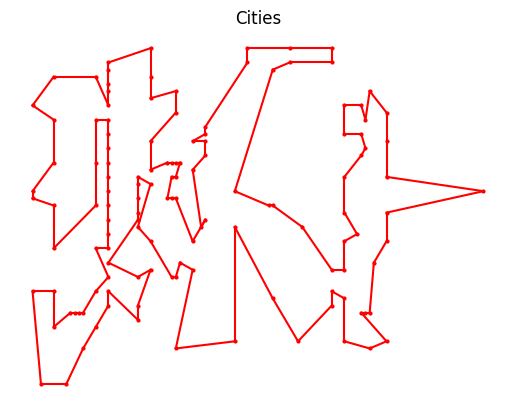

In [35]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.title("Cities")

plt.plot(cities[:, 0], cities[:,1], 'or', markersize=2)

for i in range(len(permutation) - 1):
    plt.plot(cities[[permutation[i], permutation[i+1]], 0], cities[[permutation[i], permutation[i+1]], 1], c="r")

plt.plot(cities[[permutation[len(cities) - 1], 0], 0], cities[[permutation[len(cities) - 1], 0], 1], c="r")

plt.show()

In [36]:
from sklearn.cluster import KMeans

N_CLUSTERS = 10

kmeans = KMeans(n_clusters=N_CLUSTERS).fit(cities)
print(kmeans.labels_)

LABELS = np.atleast_1d(kmeans.labels_)
CENTROIDS = np.atleast_2d(kmeans.cluster_centers_)

[2 9 9 9 2 2 2 9 9 9 9 2 2 2 2 2 2 2 2 5 5 5 3 3 2 2 2 5 5 5 5 5 5 5 5 5 3
 3 3 3 3 3 3 3 8 8 5 5 5 5 5 5 8 8 8 0 0 0 3 3 3 0 0 8 0 0 0 8 0 0 0 0 0 8
 8 0 8 8 0 0 8 0 0 0 0 0 6 6 8 7 7 6 6 6 7 7 7 4 6 4 4 4 7 7 4 4 4 4 1 1 1
 4 4 4 1 1 1 4 1 1 4 1 4 4 4 1 1 1 1 4 1]


In [37]:
import matplotlib.pyplot as plt

def plot_initial_clusters(points, kmeans, centroids):
    # reduced_data = PCA(n_components=2).fit_transform(data)
    # kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
    # kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )

    for idx, c in enumerate(centroids):
        plt.annotate(idx, c, fontsize = 30)

    plt.title(
        "K-means clustering\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

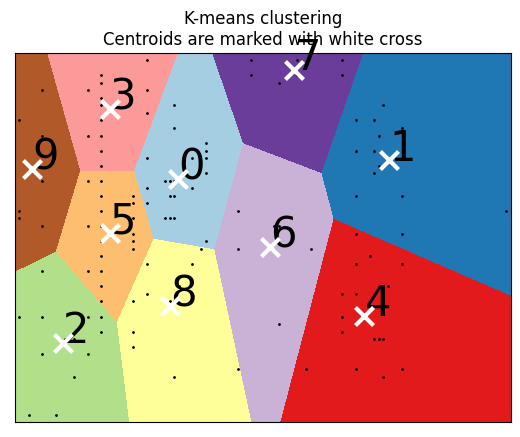

In [38]:
plot_initial_clusters(cities, kmeans, CENTROIDS)

In [39]:
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix

subproblems = []

for i in range(N_CLUSTERS):
    problem = np.atleast_2d([city for idx, city in enumerate(cities) if kmeans.labels_[idx] == i])
    subproblems.append(problem)

CLUSTERS = []
for p in subproblems:
    distance_matrix = euclidean_distance_matrix(p)
    permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
    print(distance)
    subset = np.atleast_2d([p[x] for x in permutation])
    print(subset)
    CLUSTERS.append(subset)


67.79330041353779
[[28 28]
 [28 30]
 [28 34]
 [34 41]
 [34 38]
 [38 34]
 [41 36]
 [41 35]
 [41 34]
 [41 32]
 [38 30]
 [35 31]
 [34 31]
 [33 31]
 [32 31]
 [33 29]
 [34 29]
 [41 23]
 [34 26]
 [33 26]
 [32 26]]
100.91320526163365
[[ 74  29]
 [ 84  29]
 [ 84  24]
 [107  27]
 [ 84  34]
 [ 79  33]
 [ 78  32]
 [ 78  35]
 [ 79  37]
 [ 84  38]
 [ 80  41]
 [ 78  39]
 [ 74  39]
 [ 74  35]]
67.55636753188037
[[ 0 13]
 [ 5  8]
 [ 2  0]
 [ 8  0]
 [12  5]
 [15  8]
 [18 11]
 [18 13]
 [15 13]
 [12 10]
 [11 10]
 [10 10]
 [ 9 10]
 [ 5 13]
 [ 5 19]]
52.41019230847484
[[15 37]
 [15 43]
 [18 42]
 [18 44]
 [18 45]
 [28 47]
 [28 43]
 [28 40]
 [18 41]
 [18 39]
 [18 37]
 [18 35]
 [18 33]]
81.79338114976957
[[63  6]
 [71 11]
 [74 12]
 [71 13]
 [71 16]
 [74 16]
 [74 20]
 [74 24]
 [77 21]
 [84 20]
 [81 17]
 [78 10]
 [79 10]
 [80 10]
 [84  6]
 [80  5]
 [74  6]]
54.826875656791884
[[15 19]
 [18 15]
 [18 17]
 [18 19]
 [25 22]
 [25 23]
 [25 24]
 [25 26]
 [25 28]
 [25 29]
 [18 29]
 [18 31]
 [15 31]
 [15 25]
 [18 27]
 [

In [40]:
from math import dist

def plot_clusters(points, clusters, centroids):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)

    for cluster in clusters:
        for i in range(len(cluster) - 1):
            plt.plot(cluster[[i, i+1], 0], cluster[[i, i+1], 1], c="k")
        plt.plot(cluster[[len(cluster) - 1, 0], 0], cluster[[len(cluster) - 1, 0], 1], c="k")

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

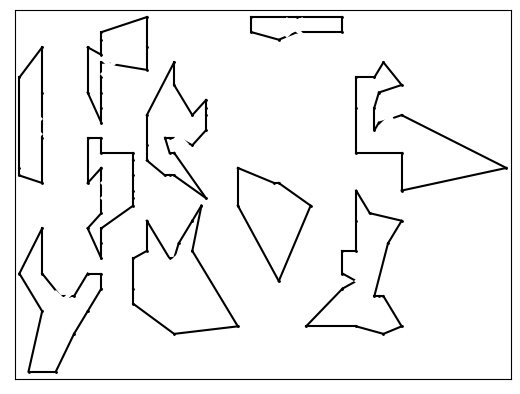

In [41]:
plot_clusters(cities, CLUSTERS, CENTROIDS)

In [42]:
def concatenate_clusters(cluster_a: np.ndarray, cluster_b: np.ndarray, centroid_a: np.ndarray, centroid_b: np.ndarray) -> (np.ndarray, np.ndarray):
    
    def get_closest_points(cluster, centroid):

        distances = []
        for point in cluster:
            distances.append((point, dist(point, centroid)))
        distances.sort(key=lambda x: x[1])
        p1 = distances[0][0]

        idx1 = [idx for idx, x in enumerate(cluster) if x[0] == p1[0] and x[1] == p1[1]][0]

        forward = idx1 + 1
        if forward >= len(cluster):
            forward = 0
        backward = idx1 - 1

        new_perm = list(cluster)

        if dist(cluster[forward], centroid) < dist(cluster[backward], centroid):
            p2 = cluster[forward]
            idx2 = forward
            new_perm = new_perm[idx1::-1] + new_perm[:idx2 - 1:-1]
        else:
            p2 = cluster[backward]
            idx2 = backward
            new_perm = new_perm[idx1:] + new_perm[:idx2 + 1]

        return p1, p2, np.atleast_2d(new_perm)
    
    p1, p2, new_cluster_a = get_closest_points(cluster_a, centroid_b)
    p3, p4, new_cluster_b = get_closest_points(cluster_b, centroid_a)
    
    def ccw(A,B,C):
        return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

    # Return true if line segments AB and CD intersect
    def intersect(A,B,C,D):
        return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)
    
    result = new_cluster_a

    if intersect(p1, p3, p2, p4):
        result = np.concatenate((result, new_cluster_b), axis=0)
    else:
        result = np.concatenate((result, np.flip(new_cluster_b, 0)), axis=0)

    def get_centeroid(arr):
        x = np.mean(arr[:, 0])
        y = np.mean(arr[:, 1])
        return np.atleast_1d([x, y])
    
    return result, get_centeroid(result)

In [43]:
while len(CLUSTERS) > 1:
    A = 0
    B = 1

    for i in range(1, len(CENTROIDS)):
        if (dist(CENTROIDS[i], CENTROIDS[A]) < dist(CENTROIDS[B], CENTROIDS[A])):
            B = i
    print(A, B)

    new_cluster, new_centroid = concatenate_clusters(CLUSTERS[A], CLUSTERS[B], CENTROIDS[A], CENTROIDS[B])

    CLUSTERS = [np.atleast_2d(x) for idx, x in enumerate(CLUSTERS) if idx != A and idx != B]
    CENTROIDS = [x for idx, x in enumerate(CENTROIDS) if idx != A and idx != B]

    print(CENTROIDS)

    CLUSTERS.append(new_cluster)
    CENTROIDS.append(new_centroid)
    CENTROIDS = np.atleast_2d(CENTROIDS)

0 5
[array([81.21428571, 33.71428571]), array([9.66666667, 9.53333333]), array([19.84615385, 40.46153846]), array([75.82352941, 13.11764706]), array([55.        , 22.16666667]), array([60.42857143, 45.71428571]), array([33.15384615, 14.38461538]), array([ 2.85714286, 32.57142857])]
0 3
[array([9.66666667, 9.53333333]), array([19.84615385, 40.46153846]), array([55.        , 22.16666667]), array([60.42857143, 45.71428571]), array([33.15384615, 14.38461538]), array([ 2.85714286, 32.57142857]), array([27.94871795, 27.92307692])]
0 4
[array([19.84615385, 40.46153846]), array([55.        , 22.16666667]), array([60.42857143, 45.71428571]), array([ 2.85714286, 32.57142857]), array([27.94871795, 27.92307692]), array([78.25806452, 22.41935484])]
0 4
[array([55.        , 22.16666667]), array([60.42857143, 45.71428571]), array([ 2.85714286, 32.57142857]), array([78.25806452, 22.41935484]), array([20.57142857, 11.78571429])]
0 3
[array([60.42857143, 45.71428571]), array([ 2.85714286, 32.57142857]),

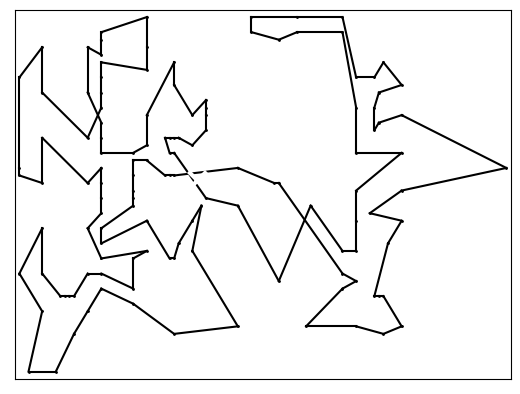

In [44]:
plot_clusters(cities, CLUSTERS, CENTROIDS)

In [45]:
cost = 0
for i in range(len(CLUSTERS[0]) - 1):
    cost += dist(CLUSTERS[0][i], CLUSTERS[0][i + 1])
cost += dist(CLUSTERS[0][-1], CLUSTERS[0][0])
print(cost)

724.0232906320662
